# Wordle musings

This examines traits of words; letter frequency, starting letter, and repeated letters. Starting point is the North American Scrabble Player's official word list: http://www.scrabbleplayers.org/w/NASPA_Zyzzyva_Linux_Installation. Focus is on five letter words.

## Letter Frequencies

This first bit of code calculates letter frequencies for all words, for all five letter words, and for all non-plural five letter words. The non-plural analysis is based on the observation that plural words rarely, if ever, show up as answers in Wordle puzzles. The method used for determining if a word is plural is, albeit primitive: the word is plural if it ends in 'S' but not 'SS'.

In [4]:
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick

# British dictionary
file_name = 'NASPA_CSW21.txt'

# North American dictionary
# file_name = 'NWL2020.txt'

alphabet = 'ABCDEFGHIJKLMNOPQRSTUVWXYZ'
all_five_letter_words = []
all_words_letters = {}
all_words_count = 0
all_words_letters_count = 0
five_letter_words_letters = {}
five_letter_words_count = 0
five_letter_words_letters_count = 0
five_letter_no_plurals_letters = {}
five_letter_no_plurals_count = 0
five_letter_no_plurals_letters_count = 0
start_letters = {}
start_letters_count = 0

for letter in alphabet:
    all_words_letters[letter] = 0
    five_letter_words_letters[letter] = 0
    five_letter_no_plurals_letters[letter] = 0
    start_letters[letter] = 0

words = open(file_name, 'r')
for entry in words:
    space = entry.find(' ')
    if space < 0:
        word = entry
    else:
        word = entry[0:space]
    all_words_count += 1
    trimmed_word = word.strip().upper()
    for letter in trimmed_word:
        all_words_letters[letter] = all_words_letters[letter] + 1
        all_words_letters_count += 1
    if len(trimmed_word) == 5:
        all_five_letter_words.append(trimmed_word)
        five_letter_words_count += 1
        for letter in trimmed_word:
            five_letter_words_letters[letter] = five_letter_words_letters[letter] + 1
            five_letter_words_letters_count += 1
        if trimmed_word[4] != 'S' or (trimmed_word[3] == 'S' and trimmed_word[4] == 'S'):
            five_letter_no_plurals_count += 1
            for letter in trimmed_word:
                five_letter_no_plurals_letters[letter] = five_letter_no_plurals_letters[letter] + 1
                five_letter_no_plurals_letters_count += 1
            start_letters[trimmed_word[0]] = start_letters[trimmed_word[0]] + 1
            start_letters_count += 1

words.close()
all_words_letter_sorted_counts = sorted(all_words_letters.items(), key=lambda x:x[1])
five_letter_words_letter_sorted_counts = sorted(five_letter_words_letters.items(), key=lambda x:x[1])
five_letter_no_plurals_letter_sorted_counts = sorted(five_letter_no_plurals_letters.items(), key=lambda x:x[1])
start_letters_sorted_counts = sorted(start_letters.items(), key=lambda x:x[1])
print('Dictionary Statistics:')
print('Total words in Scrabble word list: %s' % all_words_count)
print('Total 5 Letter Words: %s' % five_letter_words_count)
print('Total Non-Plural 5 Letter Words: %s' % five_letter_no_plurals_count)

Dictionary Statistics:
Total words in Scrabble word list: 279077
Total 5 Letter Words: 12915
Total Non-Plural 5 Letter Words: 9006


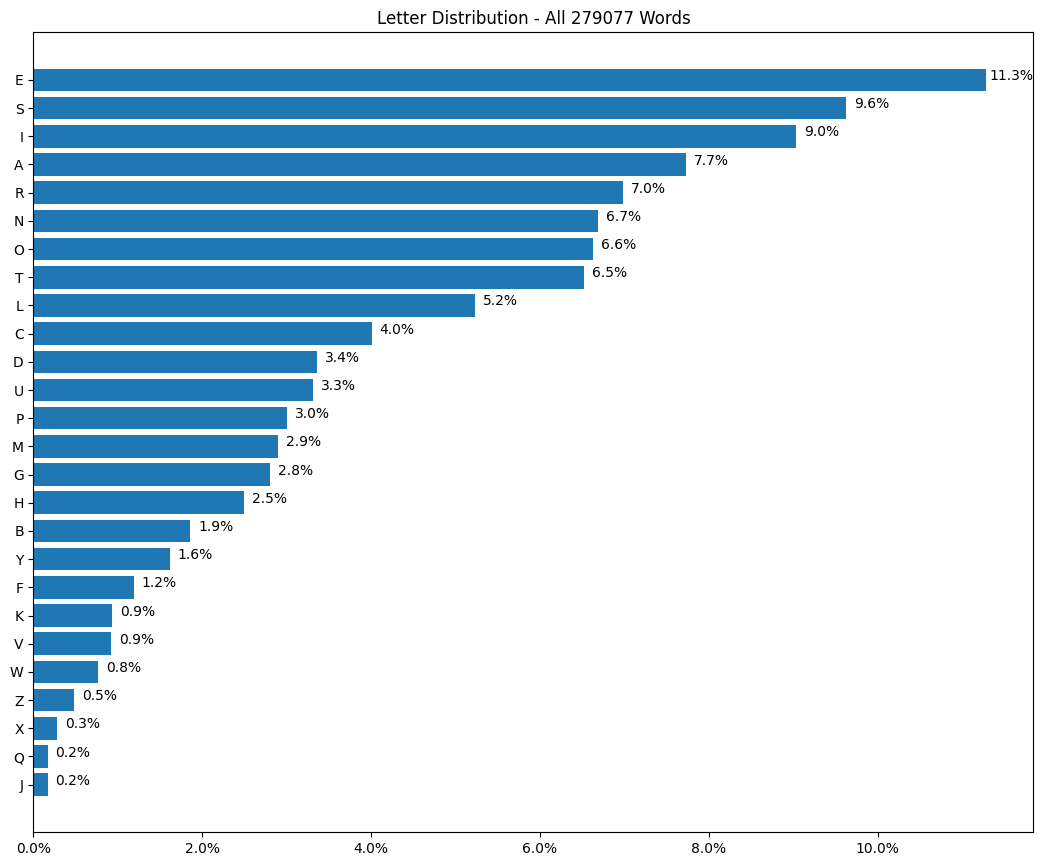

In [5]:
letters = []
averages = []
for item in all_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/all_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s Words' % all_words_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

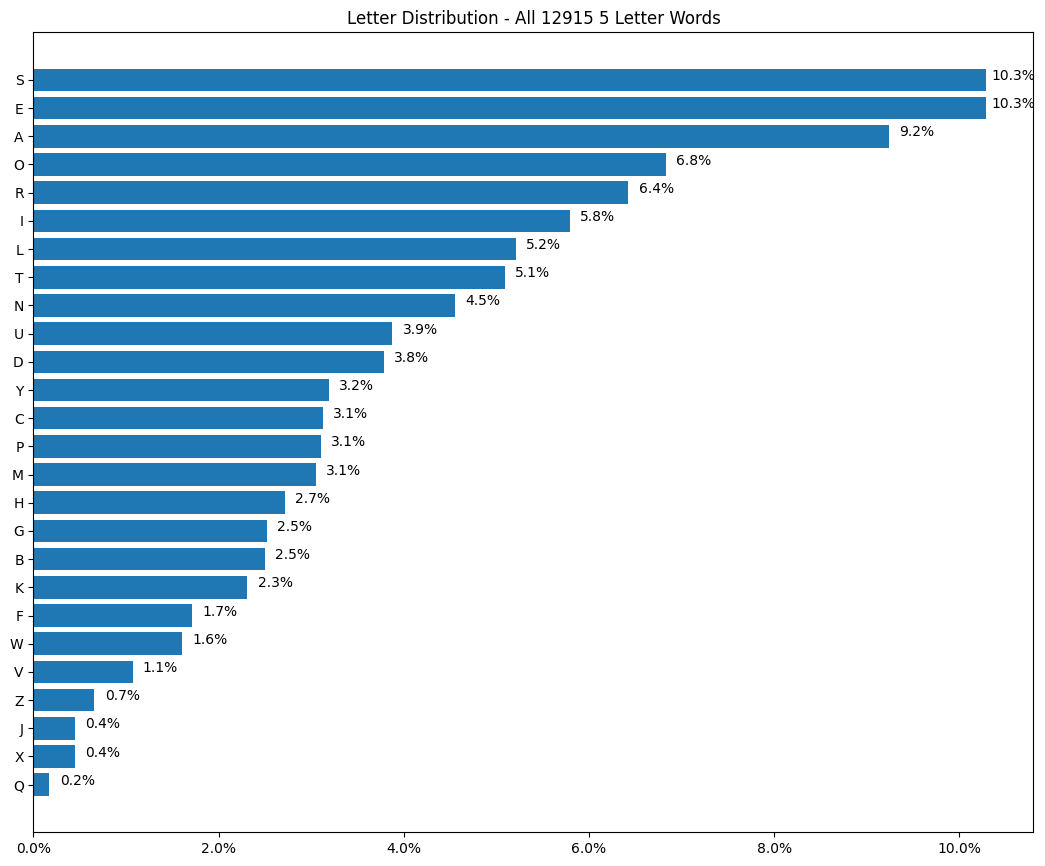

In [6]:
letters = []
averages = []
for item in five_letter_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/five_letter_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s 5 Letter Words' % five_letter_words_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

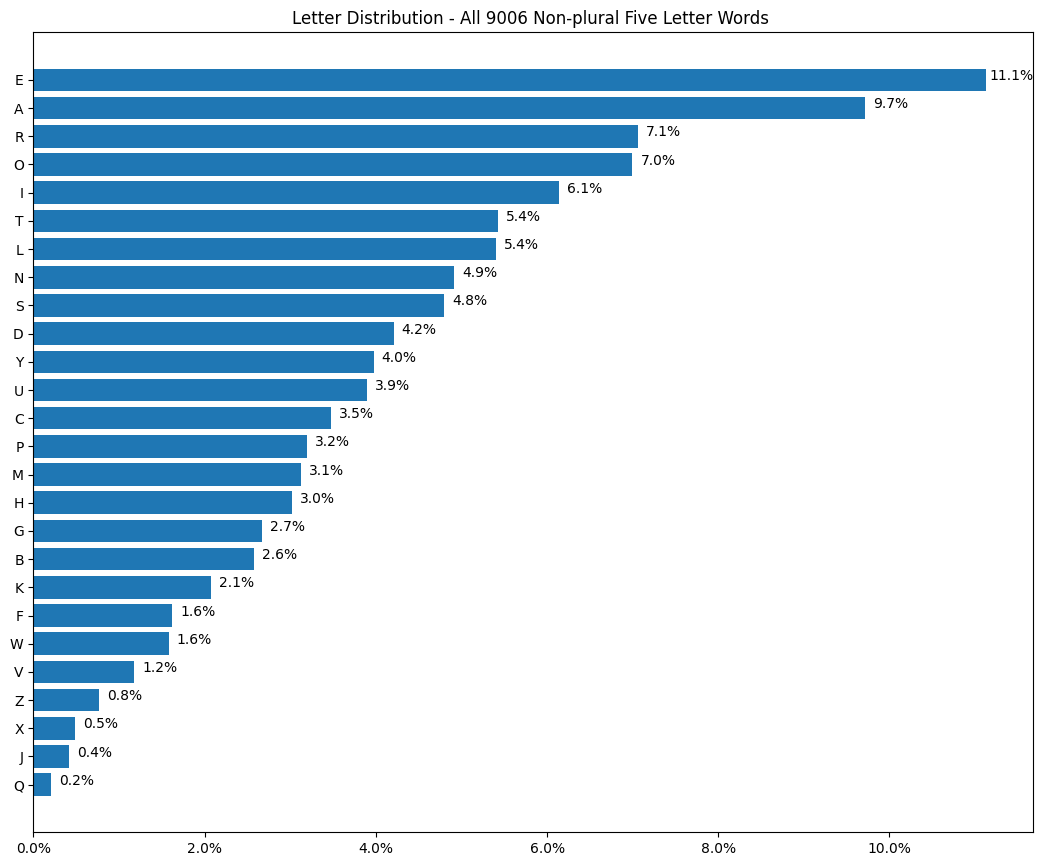

In [7]:
letters = []
averages = []
for item in five_letter_no_plurals_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/five_letter_no_plurals_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - All %s Non-plural Five Letter Words ' % five_letter_no_plurals_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Starting Letters

Next, look at frequency of starting letters for non-plural five letter words. 

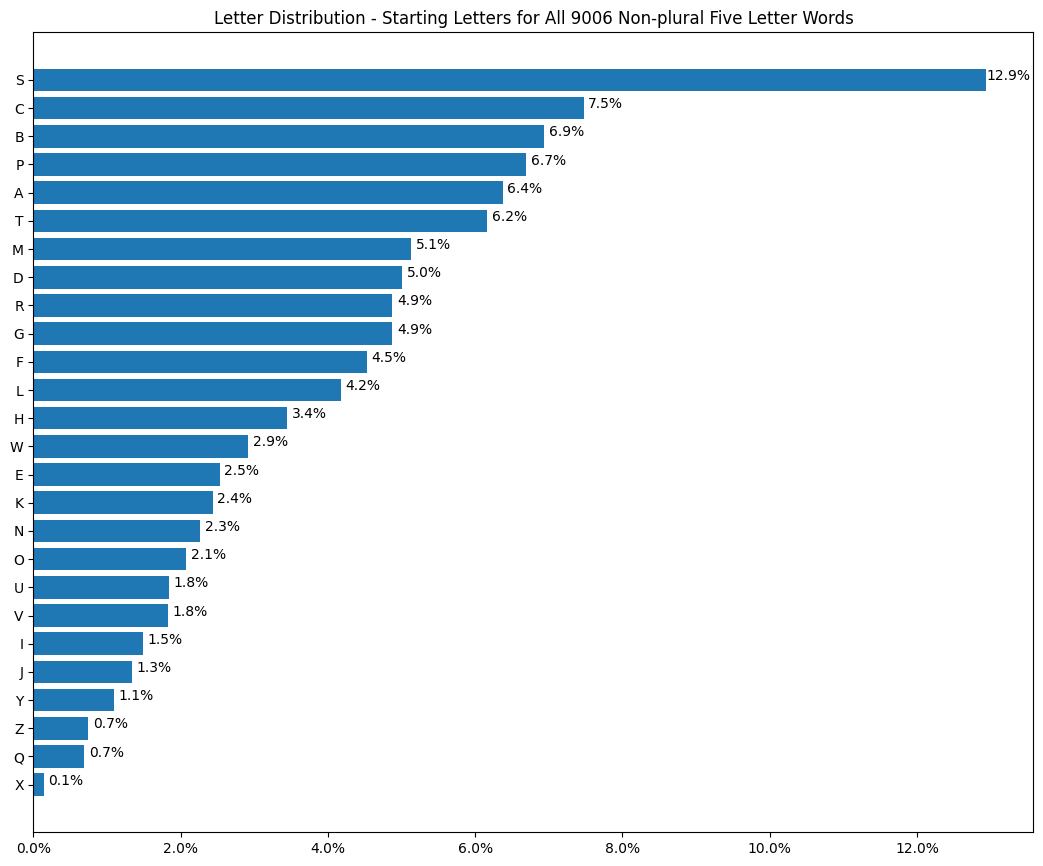

In [8]:
letters = []
averages = []
for item in start_letters_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/start_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Starting Letters for All %s Non-plural Five Letter Words' % five_letter_no_plurals_count)
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Prior Wordle Answers

Now we'll do the same analysis on the previous Wordle puzzle answers (as of May 22, 2205).

In [10]:
file_name = 'past_answers.txt'

wordle_words = []
wordle_words_letters = {}
wordle_words_start_letters = {}
wordle_words_count = 0
wordle_words_letters_count = 0
wordle_words_start_letters_count = 0

for letter in alphabet:
    wordle_words_letters[letter] = 0
    wordle_words_start_letters[letter] = 0

words = open(file_name, 'r')
for line in words:
    word = line[0:5]
    wordle_words_count += 1
    trimmed_word = word.strip().upper()
    wordle_words.append(trimmed_word)
    wordle_words_start_letters[trimmed_word[0]] = wordle_words_start_letters[trimmed_word[0]] + 1
    wordle_words_start_letters_count += 1
    for letter in trimmed_word:
        wordle_words_letters[letter] = wordle_words_letters[letter] + 1
        wordle_words_letters_count += 1
words.close()

wordle_words_letter_sorted_counts = sorted(wordle_words_letters.items(), key=lambda x:x[1])
wordle_words_start_letters_sorted_counts = sorted(wordle_words_start_letters.items(), key=lambda x:x[1])
print('Total previous Wordle answers:: %s' % wordle_words_count)

Total previous Wordle answers:: 1438


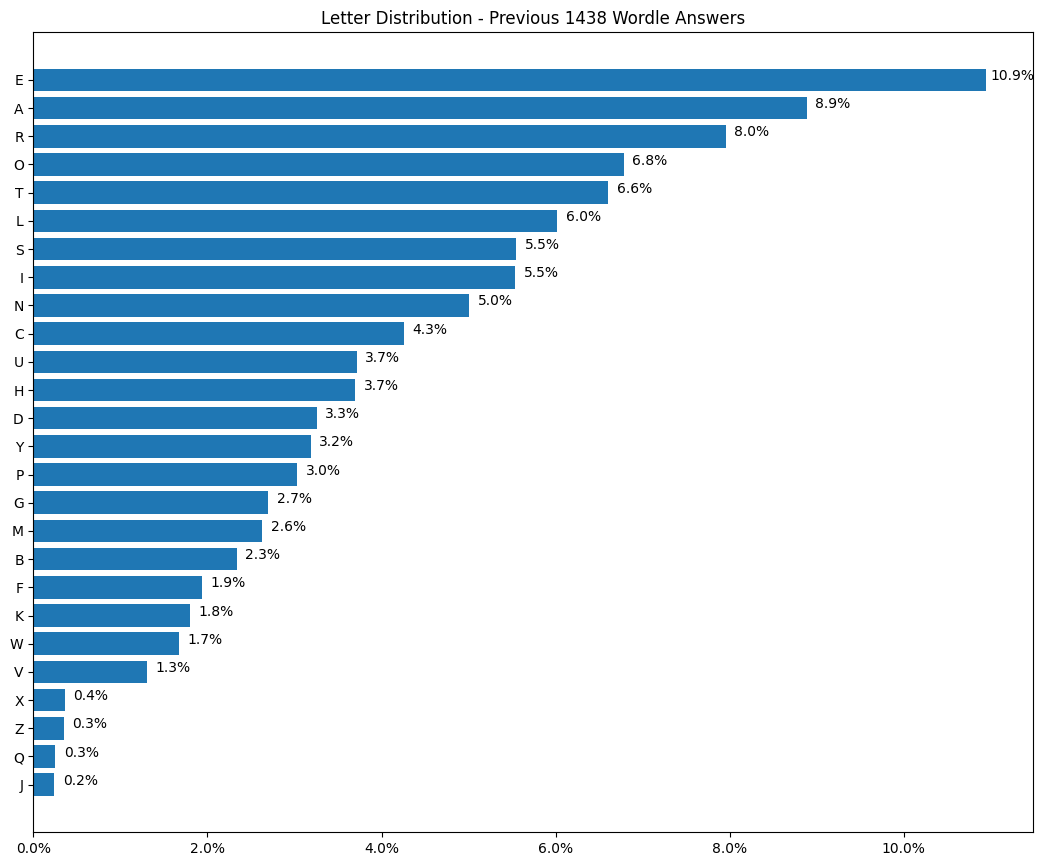

In [11]:
letters = []
averages = []
for item in wordle_words_letter_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/wordle_words_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Previous %s Wordle Answers' % len(wordle_words))
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.3, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

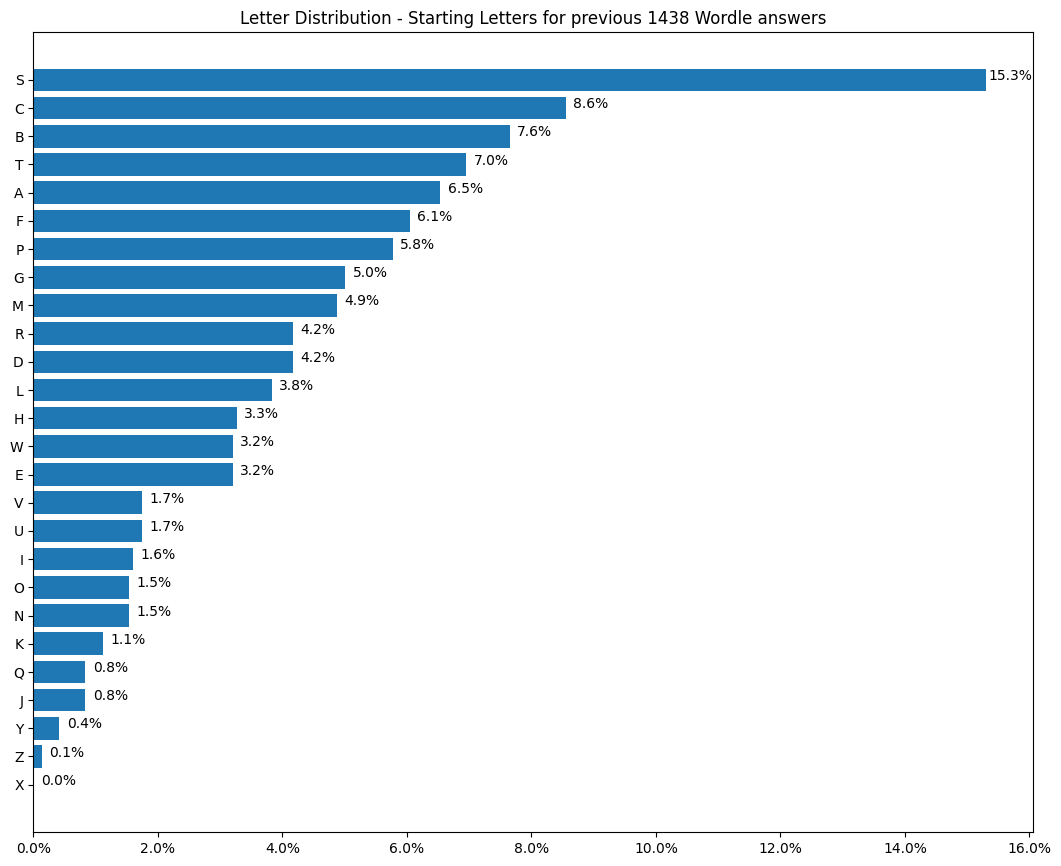

In [12]:
letters = []
averages = []
for item in wordle_words_start_letters_sorted_counts:
    letters.append(item[0])
    averages.append(item[1]/wordle_words_start_letters_count*100)

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Starting Letters for previous %s Wordle answers' % len(wordle_words))
ax.barh(letters,averages)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(averages)):
    plt.text(averages[i] + 0.4, i,  "{:.1f}%".format(averages[i]), ha='center')
plt.show()

## Repeated Letters

This bit of code looks at five letter words to determine how often letters are repeated in a word, for all five letter words, for non-plural five letter words, and for the previous Wordle answers. 

In [13]:
def repeated_letters(word):
    letters_repeated = set()
    if len(word) != len(set(word)):
        # This means at least one letter is repeated
        word_letters = list(word)
        for letter in word:
            word_letters.remove(letter)
            if letter in word_letters:
                letters_repeated.add(letter)

    return letters_repeated
    
five_letter_words_repeated_letters = {}
five_letter_words_repeated_letters_words_count = 0
five_letter_no_plurals_repeated_letters = {}
five_letter_no_plurals_repeated_letters_words_count = 0
wordle_words_repeated_letters = {}
wordle_words_repeated_letters_words_count = 0

for letter in alphabet:
    five_letter_words_repeated_letters[letter] = 0
    five_letter_no_plurals_repeated_letters[letter] = 0
    wordle_words_repeated_letters[letter] = 0

for word in all_five_letter_words:
    letters_repeated = repeated_letters(word)
    if len(letters_repeated) > 0:
        if word[4] == 'S':
            five_letter_words_repeated_letters_words_count += 1
        else:
            five_letter_no_plurals_repeated_letters_words_count += 1
        for letter in letters_repeated:
            if word[4] == 'S':
                five_letter_words_repeated_letters[letter] = five_letter_words_repeated_letters[letter] + 1
            else:
                five_letter_no_plurals_repeated_letters[letter] = five_letter_no_plurals_repeated_letters[letter] + 1

for word in wordle_words:
    letters_repeated = repeated_letters(word)
    if len(letters_repeated) > 0:
        wordle_words_repeated_letters_words_count += 1
        for letter in letters_repeated:
            wordle_words_repeated_letters[letter] = wordle_words_repeated_letters[letter] + 1

five_letter_words_repeated_letters_sorted = sorted(five_letter_words_repeated_letters.items(), key=lambda x:x[1])
five_letter_no_plurals_repeated_letters_sorted = sorted(five_letter_no_plurals_repeated_letters.items(), key=lambda x:x[1])
wordle_words_repeated_letters_sorted = sorted(wordle_words_repeated_letters.items(), key=lambda x:x[1])

print("Percentage of 5 letter words that repeat letters: {:.1f}%".format(five_letter_words_repeated_letters_words_count/five_letter_words_count*100))
print("Percentage of non-plural 5 letter words that repeat letters: {:.1f}%".format(five_letter_no_plurals_repeated_letters_words_count/five_letter_no_plurals_count*100))
print("Percentage of past wordle words that repeat letters: {:.1f}%".format(wordle_words_repeated_letters_words_count/wordle_words_count*100))

Percentage of 5 letter words that repeat letters: 11.1%
Percentage of non-plural 5 letter words that repeat letters: 35.4%
Percentage of past wordle words that repeat letters: 29.9%


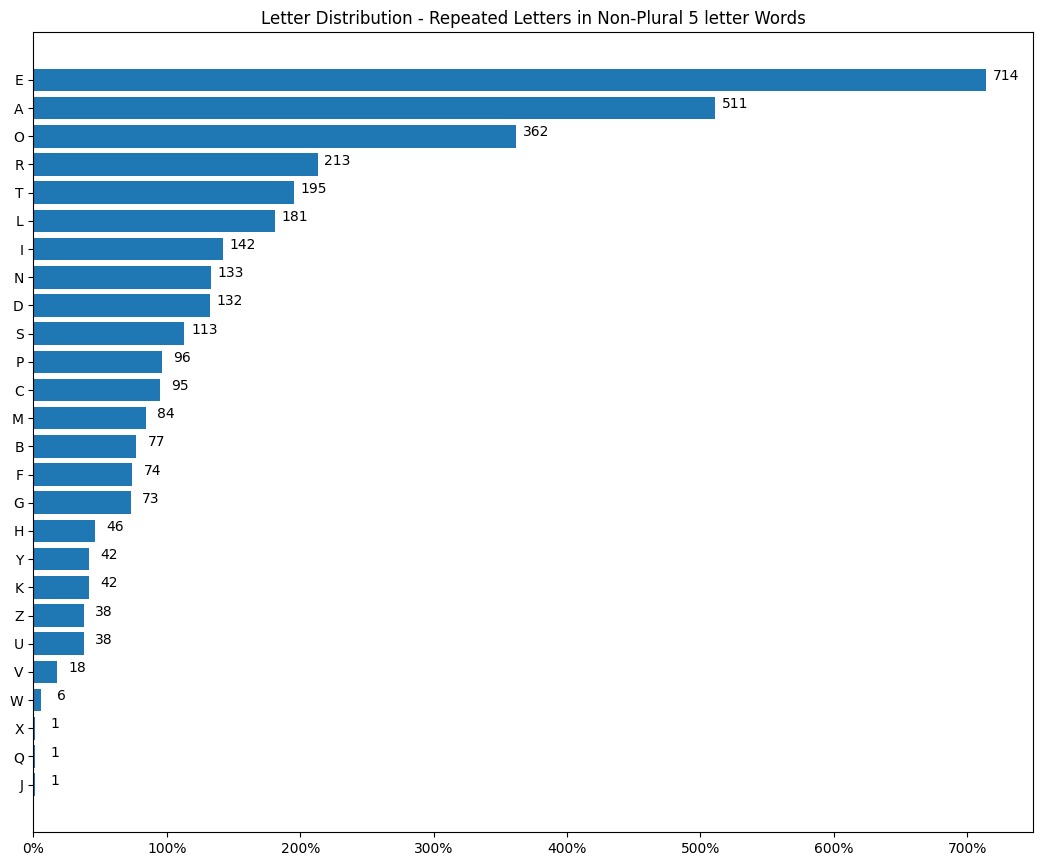

In [14]:
letters = []
counts = []
for item in five_letter_no_plurals_repeated_letters_sorted:
    letters.append(item[0])
    counts.append(item[1])

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Repeated Letters in Non-Plural 5 letter Words')
ax.barh(letters,counts)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(counts)):
    plt.text(counts[i] + 15, i, counts[i], ha='center')
plt.show()

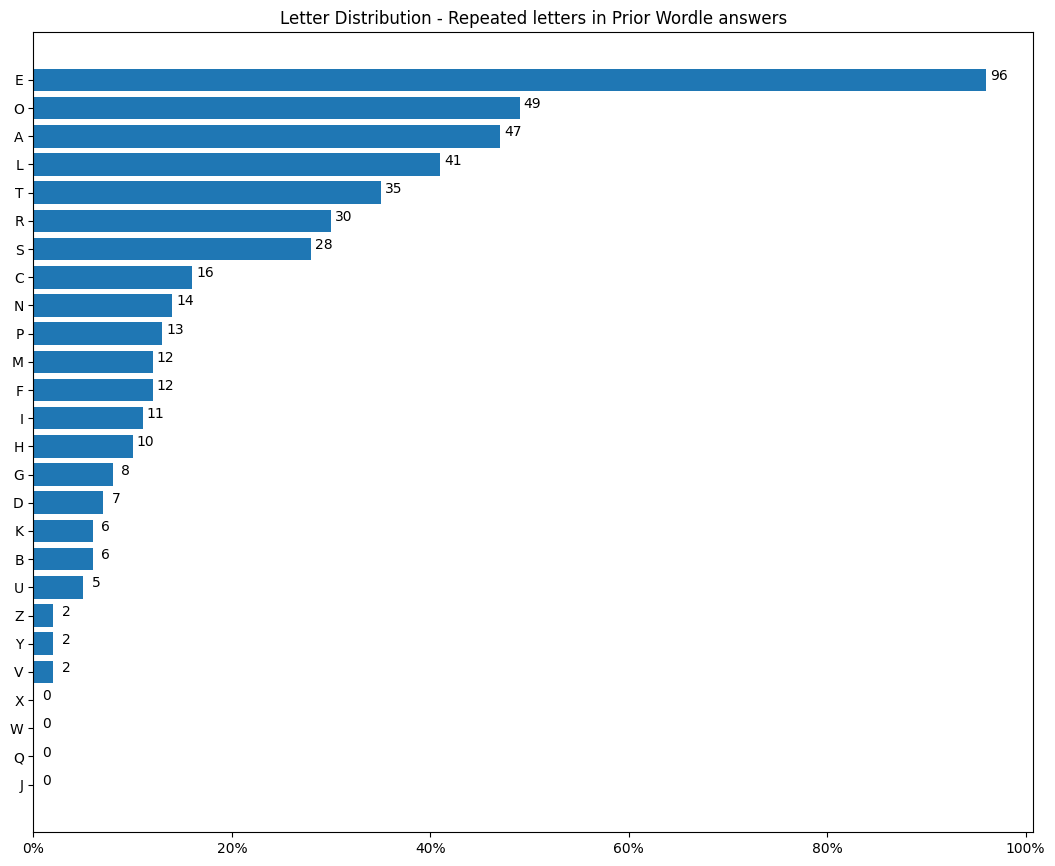

In [18]:
letters = []
counts = []
for item in wordle_words_repeated_letters_sorted:
    letters.append(item[0])
    counts.append(item[1])

fig = plt.figure(figsize=(10.0,8.0))
ax = fig.add_axes([0,0,1,1])
ax.set_title('Letter Distribution - Repeated letters in Prior Wordle answers')
ax.barh(letters,counts)
ax.xaxis.set_major_formatter(mtick.PercentFormatter())
for i in range(0, len(counts)):
    plt.text(counts[i] + 1.3, i, counts[i], ha='center')
plt.show()

## Finding Optimal Starts for Wordle, Quordle and Octordle

Purpose of this bit of code is to find the best starting attempts for Wordle, Quordle and Octordle based on two different approaches.

The first approach is optimizing consonants. Objective is to find three 5 letter words that use 15 different letters. Further, only two vowels and the remaining 13 consonants need to be the 13 most common consonants. The 'Y' will act as a vowel in one of the three words.

The second approach will be to find three 5 letter words that include all five vowels and the 10 most common consonants. Because there are so many combinations of three words that fit these two criteria, we add three more. These are patterns with lots of variations and it's useful to identify them early.
- One word must end in 'Y'
- One word must end in 'ER'
- one word must start with one of the two most common starting letters, 'S' or 'C''

In [22]:
from itertools import combinations

# The most common letters have the vowells removed and are in reverse order
most_common_letters = set(['B', 'G', 'H', 'M', 'P', 'C', 'Y', 'D', 'S', 'N', 'L', 'T', 'R'])
vowels = set(['A', 'E', 'I', 'O', 'U'])

candidate_words = []
for word in all_five_letter_words:
    if word[4] != 'S' or (word[3] == 'S' and word[4] == 'S'):
        # We know this is a 5 letter word and that it is not plural (crude approach)
        letters = set(word)
        if len(letters) == 5 and len(letters.intersection(vowels)) <= 1:
            # We know no letters are repeated and that it contains at most one vowel
            consonants = letters - vowels
            if len(consonants) == len(consonants.intersection(most_common_letters)):
                # Now we know that all the consonants are in the set of most common
                candidate_words.append(word)

print('Proceeding with %s of %s 5 letter words.'  % (len(candidate_words), len(all_five_letter_words)))

count = 0
for trio in combinations(candidate_words, 3):
    count += 1
    letters = set()
    for word in trio:
        letters = letters.union(set(word))
    word_consonants = letters.intersection(most_common_letters)
    word_vowels = letters.intersection(vowels)
    if len(word_consonants) >= 13 and len(word_vowels) >= 2:
        print(trio)
        print("Consonants used: %s" % word_consonants)
        print("Vowels used: %s" % word_vowels)
    if count % 10000000 == 0:
        print("Completed %sM combinations." % int(count/1000000))
print("Finished")





Proceeding with 830 of 12915 5 letter words.
('BANDH', 'GRYPT', 'SCLIM')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'I', 'A'}
Completed 10M combinations.
('BLAND', 'GRYPT', 'MISCH')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'I', 'A'}
('BLAND', 'GRYPT', 'SCHMO')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'O', 'A'}
('BLAST', 'CHYND', 'GRUMP')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'A', 'U'}
('BLEND', 'CHASM', 'GRYPT')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'E', 'A'}
('BLEND', 'GRYPT', 'MISCH')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels used: {'E', 'I'}
('BLEND', 'GRYPT', 'SCHMO')
Consonants used: {'D', 'T', 'H', 'N', 'L', 'Y', 'R', 'B', 'G', 'P', 'C', 'S', 'M'}
Vowels

In [34]:
from itertools import combinations

def does_one_word_end_in_y(tuple):
    for word in tuple:
        if word[4] == 'Y':
            return True
    return False

def does_one_word_end_in_er(tuple):
    for word in tuple:
        if word[3:5] == 'ER':
            return True
    return False

def does_one_word_start_with_s_or_c(tuple):
    for word in tuple:
        if word[0] == 'S' or word[0] == 'C':
            return True
    return False

# The most common letters have the vowels removed and are in reverse order
most_common_letters = set(['M', 'P', 'C', 'Y', 'D', 'S', 'N', 'L', 'T', 'R'])
vowels = set(['A', 'E', 'I', 'O', 'U'])

candidate_words = []
for word in all_five_letter_words:
    if word[4] != 'S' or (word[3] == 'S' and word[4] == 'S'):
        # We know this is a 5 letter word and that it is not plural (crude approach)
        letters = set(word)
        if len(letters) == 5:
            # We know no letters are repeated
            consonants = letters - vowels
            if len(consonants) == len(consonants.intersection(most_common_letters)):
                # Now we know that all the consonants are in the set of most common
                candidate_words.append(word)

print('Proceeding with %s of %s 5 letter words.'  % (len(candidate_words), len(all_five_letter_words)))

count = 0
found = 0
for trio in combinations(candidate_words, 3):
    count += 1
    letters = set()
    for word in trio:
        letters = letters.union(set(word))
    word_consonants = letters.intersection(most_common_letters)
    word_vowels = letters.intersection(vowels)
    if len(word_consonants) == 10 and len(word_vowels) == 5:
        if does_one_word_end_in_y(trio) and does_one_word_end_in_er(trio) and does_one_word_start_with_s_or_c(trio):
            found += 1
            print("%s\t%s" % (found, trio))
    if count % 10000000 == 0:
        print("Completed %sM combinations." % int(count/1000000))
print("Finished")

Proceeding with 1964 of 12915 5 letter words.
1	('ACIDY', 'LONER', 'STUMP')
2	('ACIDY', 'NOTER', 'SLUMP')
3	('ACIDY', 'SLUMP', 'TONER')
4	('ACOLD', 'INTER', 'SPUMY')
5	('ACOLD', 'MINTY', 'SPUER')
6	('ACOLD', 'MINTY', 'SUPER')
7	('ACOLD', 'MUTER', 'SNIPY')
8	('ACOLD', 'MUTER', 'SPINY')
9	('ACOLD', 'NITER', 'SPUMY')
Completed 10M combinations.
10	('ACTIN', 'DUMPY', 'SOLER')
11	('ACTIN', 'MOLDY', 'SPUER')
12	('ACTIN', 'MOLDY', 'SUPER')
13	('ACTIN', 'OLDER', 'SPUMY')
14	('ACTON', 'DIMLY', 'SPUER')
15	('ACTON', 'DIMLY', 'SUPER')
16	('ACTON', 'DUMPY', 'SILER')
17	('ACTON', 'DUMPY', 'SLIER')
18	('ACTON', 'DUPER', 'SLIMY')
19	('ACTON', 'IDLER', 'SPUMY')
20	('ACTON', 'LUMPY', 'SIDER')
21	('ACTON', 'PLUMY', 'SIDER')
Completed 20M combinations.
22	('ADMIN', 'COPER', 'LUSTY')
23	('ADMIN', 'COPSY', 'LUTER')
24	('ADMIN', 'CULTY', 'POSER')
25	('ADMIN', 'CUTER', 'SLOPY')
26	('ADMIT', 'CUSPY', 'LONER')
Completed 30M combinations.
27	('ADMIT', 'PUCER', 'SONLY')
28	('ADSUM', 'COPER', 'LINTY')
29	('ADULT'